In [1]:
import b3d
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
from b3d import Pose, Mesh
import rerun as rr

In [18]:
b3d.rr_init()

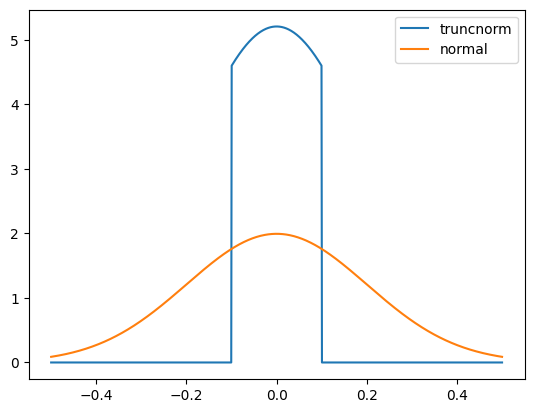

In [38]:

bounds = jnp.array([0.5, 0.5, 0.5, 0.5])
observed_rgbd = jnp.zeros((480, 640, 4))
rendered_rgbd = jnp.zeros((480, 640, 4))
variances = jnp.array([0.2,0.2,0.2,0.2])

x = jnp.linspace(-0.5, 0.5, 1000)
trunc_pdfs = jax.vmap(lambda x: jax.scipy.stats.truncnorm.pdf(x, -bounds[0], bounds[0], loc=0, scale=variances[0]))(x)
normal_pdfs = jax.vmap(lambda x: jax.scipy.stats.norm.pdf(x, loc=0, scale=variances[0]))(x)
plt.plot(x, trunc_pdfs, label="truncnorm")
plt.plot(x, normal_pdfs, label="normal")
plt.legend()


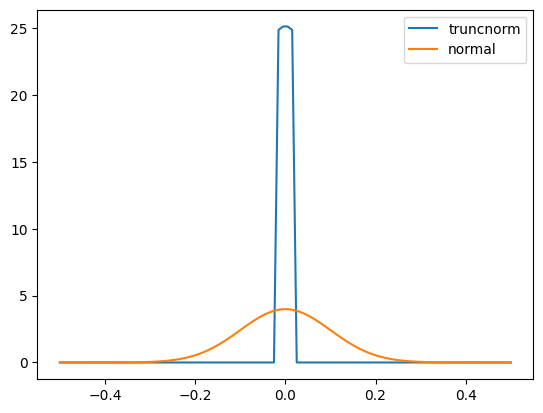

In [24]:
inlier_probability_per_pixel = jax.scipy.stats.truncnorm.pdf(
    observed_rgbd - rendered_rgbd, -bounds, bounds,
    loc=jnp.zeros(4),
    scale=variances
)

b3d.rr_log_depth("distribution", inlier_probability_per_pixel[...,0])


inlier_probability_per_pixel = jax.scipy.stats.norm.pdf(
    observed_rgbd - rendered_rgbd,
    loc=jnp.zeros(4),
    scale=variances
)
b3d.rr_log_depth("distribution/normal", inlier_probability_per_pixel[...,0])

In [8]:
inlier_probability_per_pixel

Array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.